In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
import time

In [ ]:
#loading dataset
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#Training dataset
print('X_train:', X_train.shape, 'y_train:', y_train.shape)

#Splitting test dataset into 50% validation and 50% Test sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)
print('X_test:', X_test.shape, 'y_test:', y_test.shape) 
print('X_val:', X_val.shape, 'y_val:', y_val.shape)

X_train: (50000, 32, 32, 3) y_train: (50000, 1)
X_test: (5000, 32, 32, 3) y_test: (5000, 1)
X_val: (5000, 32, 32, 3) y_val: (5000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


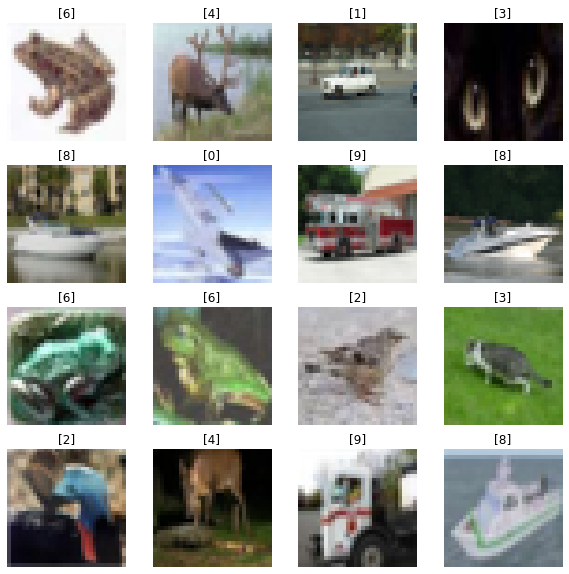

In [ ]:
#Visualizing the dataset
fig, axes = plt.subplots(4, 4, figsize = (10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(50000)
        img = X_train[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(y_train[index].astype('int'))
        axe.set_axis_off()

'Number of figures in each class'

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])

Text(0, 0.5, 'Number of Elemenets in Each Class')

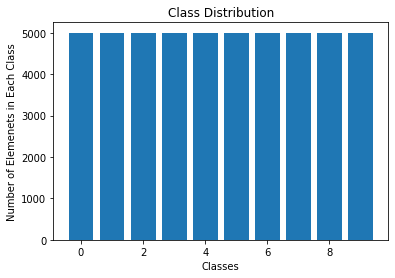

In [ ]:
#Visualizing the class distribution
unique, counts = np.unique(y_train, return_counts=True)
display('Number of figures in each class', counts)

plt.figure()
plt.bar(unique, counts)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Elemenets in Each Class')

So, the distribution of classes is quite uniform.

In [ ]:
#Normalizing the data to range 0-1
X_train = X_train.astype('float') / 255.0
X_test = X_test.astype('float') / 255.0
X_val = X_val.astype('float') / 255.0

#One hot encoding
y_train = to_categorical(y_train)
y_train = y_train[:,0:10]
y_test = to_categorical(y_test)
y_test = y_test[:,0:10]
y_val = to_categorical(y_val)
y_val = y_val[:,0:10]

# CNN

In [ ]:
#Building a Convolutional neural network (CNN)
model_CNN2 = tf.keras.models.Sequential()

#layer 1
model_CNN2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model_CNN2.add(BatchNormalization())

#layer 1
model_CNN2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model_CNN2.add(BatchNormalization())

#layer 2
model_CNN2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#Layer 6
model_CNN2.add(tf.keras.layers.Dropout(0.2))

#layer 1
model_CNN2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model_CNN2.add(BatchNormalization())

#layer 1
model_CNN2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model_CNN2.add(BatchNormalization())

#layer 2
model_CNN2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#Layer 6
model_CNN2.add(tf.keras.layers.Dropout(0.3))

#layer 3
model_CNN2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model_CNN2.add(BatchNormalization())

#layer 3
model_CNN2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model_CNN2.add(BatchNormalization())

#layer 4
model_CNN2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#Layer 6
model_CNN2.add(tf.keras.layers.Dropout(0.4))

#Flattenning
model_CNN2.add(tf.keras.layers.Flatten())

#layer 5
model_CNN2.add(tf.keras.layers.Dense(units=128, activation='sigmoid'))
model_CNN2.add(BatchNormalization())

#Layer 6
model_CNN2.add(tf.keras.layers.Dropout(0.5))

#Output layer
model_CNN2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model_CNN2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
#Using Adam Optimizer
model_CNN2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_CNN2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
#Calculating time
startModel_CNN2 = time.time()
X_train_CNN2 = X_train
y_train_CNN2 = y_train
X_val_CNN2 = X_val
y_val_CNN2 = y_val
history_CNN2 = model_CNN2.fit(X_train_CNN2, y_train_CNN2, batch_size = 32, epochs=20, verbose=1, validation_data=(X_val_CNN2, y_val_CNN2))
endModel_CNN2 = time.time()

elapsedTimeModel_CNN2 = endModel_CNN2 - startModel_CNN2

print('The elapsed time to train CNN2 model [seconds]', elapsedTimeModel_CNN2)

Epoch 1/20
1563/1563 [==============================] - 465s 297ms/step - loss: 1.6000 - accuracy: 0.4420 - val_loss: 1.1972 - val_accuracy: 0.5684
Epoch 2/20
1563/1563 [==============================] - 473s 303ms/step - loss: 1.1437 - accuracy: 0.6055 - val_loss: 0.9177 - val_accuracy: 0.6784
Epoch 3/20
1563/1563 [==============================] - 474s 303ms/step - loss: 0.9915 - accuracy: 0.6591 - val_loss: 0.8059 - val_accuracy: 0.7206
Epoch 4/20
1563/1563 [==============================] - 476s 304ms/step - loss: 0.9007 - accuracy: 0.6945 - val_loss: 0.7484 - val_accuracy: 0.7378
Epoch 5/20
1563/1563 [==============================] - 473s 303ms/step - loss: 0.8394 - accuracy: 0.7152 - val_loss: 0.7155 - val_accuracy: 0.7522
Epoch 6/20
1563/1563 [==============================] - 476s 304ms/step - loss: 0.7764 - accuracy: 0.7382 - val_loss: 0.6871 - val_accuracy: 0.7730
Epoch 7/20
1563/1563 [==============================] - 476s 304ms/step - loss: 0.7351 - accuracy: 0.7524 - val_

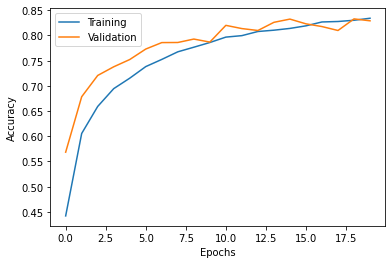

In [ ]:
#Plotting training and validation accuracy
plt.figure()
plt.plot(history_CNN2.history['accuracy'])
plt.plot(history_CNN2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])

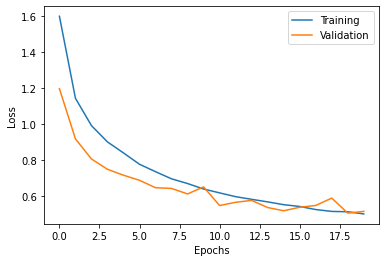

In [ ]:
#Plotting training and validation loss
plt.figure()
plt.plot(history_CNN2.history['loss'])
plt.plot(history_CNN2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])

In [ ]:
#Evaluating CNN2 model
X_test_CNN2 = X_test
y_test_CNN2 = y_test
loss, acc = model_CNN2.evaluate(X_test_CNN2, y_test_CNN2, verbose=0)
print('Testing Loss of CNN2 Model = ', loss)
print('Testing Accuracy of CNN2 Model = ',acc)

Testing Loss of CNN2 Model =  0.5324586033821106
Testing Accuracy of CNN2 Model =  0.8234000205993652
